<div style="padding: 10px; border-radius: 5px; text-align: center;">
    <h1 style="font-weight: bold; font-size: 45px; margin: 0;">GooglePlayStore App Success Prediction</h1>
</div>



<div style='display: flex; justify-content: center;'>
    <img src='GooglePlayStore.png' width='400' height='300' style='align-self: center;'>
</div>


# Table of Contents
1. <a href="#introduction" style="font-size: 16px;">Introduction</a>
2. <a href="#dataset-and-general-information" style="font-size: 16px;">Dataset and General Information</a>
3. <a href="#data-cleaning-and-Processing" style="font-size: 16px;">Data Cleaning and Processing</a>
4. <a href="#overview-cleaned-dataset" style="font-size: 16px;">Overview Cleaned Dataset</a>
5. <a href="#data-visualization-and-exploratory-data-analysis" style="font-size: 16px;">Data Visualization and Exploratory Data Analysis</a>
6. <a href="#models-evaluation-and-prediction" style="font-size: 16px;">Models Evaluation and Prediction</a>
7. <a href="#project-conclusion" style="font-size: 16px;">Project Conclusion</a>

<h1 style="font-size: 28px; margin: 0;">1. Introduction</h1> <a href="#introduction">:</a>
<br>
<h4 style="font-size: 18px; font-weight: normal; margin: 0; ">This project analyzes data from 10,000 web-scraped Play Store apps to gain insights into the Android market. The dataset is sourced from 'Google Play Store Apps' on Kaggle. The objective of this data analysis is to provide valuable information for app developers, allowing them to understand how downloads, reviews, and ratings affect the success of their apps. The primary focus of the project is to develop predictive models that can forecast an app's success on the Google Play Store.</h4>


# 2. Dataset and General Information<a id="dataset-and-general-information"></a>  

In [151]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# Load the dataset
df = pd.read_csv('googleplaystore.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Description of Dataset columns
1. App : The name of the app
2. Category : The category of the app
3. Rating : The rating of the app in the Play Store
4. Reviews : The number of reviews of the app
5. Size : The size of the app
6. Install : The number of installs of the app
7. Type : The type of the app (Free/Paid)
8. The price of the app (0 if it is Free)
9. Content Rating :The appropiate target audience of the app
10. Genres: The genre of the app
11. Last Updated : The date when the app was last updated
12. Current Ver : The current version of the app
13. Android Ver : The minimum Android version required to run the app

# 3. Data Cleaning and Processing <a id="data-cleaning-and-Processing"></a> 

In [154]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Rating(1474 NaN): Fill NaN with median value

In [155]:
# Fill NaN with median value
median_rating = df.Rating.median()
df.Rating.fillna(median_rating, inplace = True)

### Type(1 NaN): Drop NaN record 

In [156]:
# This price is 0 So fill in it with Free 
df[df['Type'].isna()]
df = df.drop(9148, axis=0).reset_index(drop=True)


### Android Ver(3 NaN): Fill NaN with the highest frequency version 

In [158]:
# value_counts().idxmax() is used to find the Android version with the highest frequency (i.e., the most common Android version)
# in the 'Android Ver' column of the DataFrame df. I Replace NaN with this value.
most_frequent_andoid = df['Android Ver'].value_counts().idxmax()
df["Android Ver"].fillna(most_frequent_andoid, inplace=True)

In [159]:
most_frequent_andoid

'4.1 and up'

### Current Ver(8 NaN): Fill in NaN with "Varies with device"

In [161]:
# It's hard to fill NaN with any value, so like a few cells, "Varies with device" was filled in.
df["Current Ver"].fillna("Varies with device", inplace=True)  

### Delete a row with outlier


In [164]:
# Identify rows where 'Installs' is 'Free'
rows_to_drop = df[df['Installs'] == 'Free'].index
# Drop rows from DataFrame
df.drop(rows_to_drop, inplace=True)
# Reset index if needed
df.reset_index(drop=True, inplace=True)

### Size(19M or 364k): Remove 'M' and 'k' characters, and transform k value to M value/Fill NaN with mean value

In [162]:
# Deal with the size like "14M", "454k" ...
df['Size'] = df['Size'].apply(lambda x: np.NaN if x == 'Varies with device' else x)
df['Size'] = df['Size'].apply(lambda x: float(x.replace('M', '')) if type(x) != float and 'M' in x else x)
df['Size'] = df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if type(x) != float and 'k' in x else x)

In [163]:
# Convert 'Size' column to numeric data type
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Calculate the mean of 'Size' column and fill missing values with the mean
mean_size = df['Size'].mean()
df['Size'] = df['Size'].fillna(mean_size)


### Price:  remove the '$' sign from strings 

In [165]:
# Clean '$' symbol from the 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)

### Installs (10,000+): Remove ',' and '+' 

In [166]:
# Replace commas and plus signs with empty string
df['Installs'] = df['Installs'].str.replace(r'[,+]', '', regex=True)

# Remove non-numeric values ('Free' in this case)
df['Installs'] = df['Installs'].replace('Free', '', regex=True)

# Convert 'Installs' column to numeric values
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert 'Installs' column to Int64 data type
df['Installs'] = df['Installs'].astype('Int64', errors='ignore')


### Reviews: Change type object --> int

In [167]:
df['Reviews'] = df['Reviews'].astype(int);

### Last Updated: Split it to Year and Month

In [168]:
import re
df['Month'] = df['Last Updated'].apply(lambda x: re.search('^[^\s]+', x).group(0))
df['Year'] = df['Last Updated'].apply(lambda x: re.search('[^\s]+$', x).group(0))
df = df.drop('Last Updated', axis = 1)


### Delete data duplicated

In [169]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [170]:
df.drop_duplicates(inplace=True)

In [171]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [172]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Month             0
Year              0
dtype: int64

In [173]:
# save cleaned data to a new CSV file
df.to_csv('GooglePlayStore_cleaned.csv', index=False)

# 4. Overview Cleaned Dataset  <a id="overview-cleaned-dataset"></a> 

In [34]:
import pandas as pd
from ydata_profiling import ProfileReport


In [35]:
df = pd.read_csv('googleplaystore_cleaned.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,2018


In [174]:
profile = ProfileReport(df)


In [175]:
# Display interactive widgets
profile.to_widgets()

# Display interactive HTML report
profile.to_notebook_iframe()


# 5. Data Visualization and Exploratory Data Analysis<a id="data-visualization-and-exploratory-data-analysis"></a> 

In [133]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [134]:
# Load new cleaned dataset
df = pd.read_csv('googleplaystore_cleaned.csv')

### Category
#### From the bar chart we know that most of the apps in the play store are from the categories of 'Family', 'Game', and 'Tools'

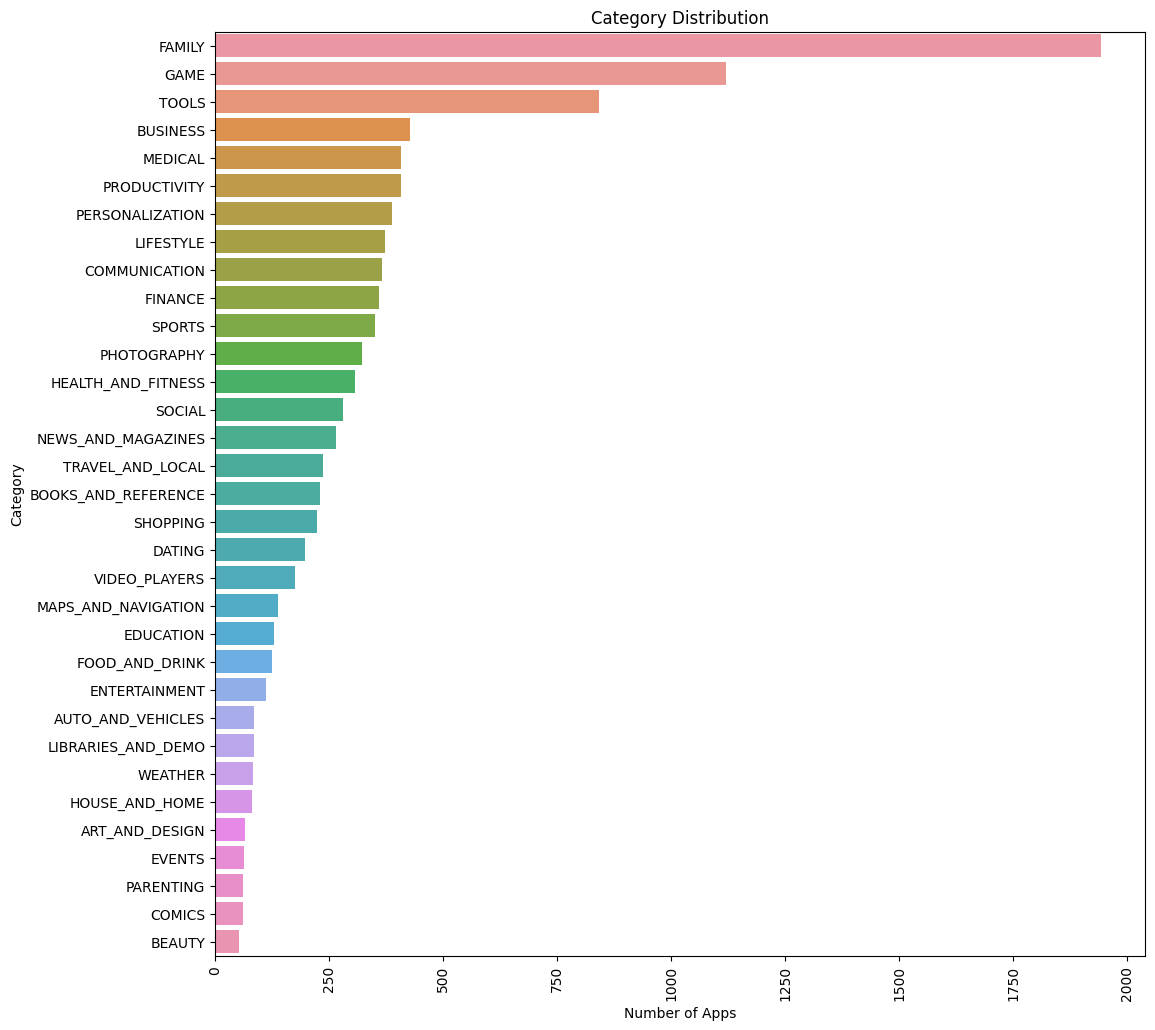

In [54]:
# Creat category bar chart 
plt.figure(figsize=(12,12))
app_cat = df.Category.value_counts()
sns.barplot(x=app_cat, y=app_cat.index, data=df);
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

### The categories 'Family', 'Game', and 'Tools' are the most prominent categories based on the larger-sized words in the WordCloud, indicating their higher frequency in the dataset.

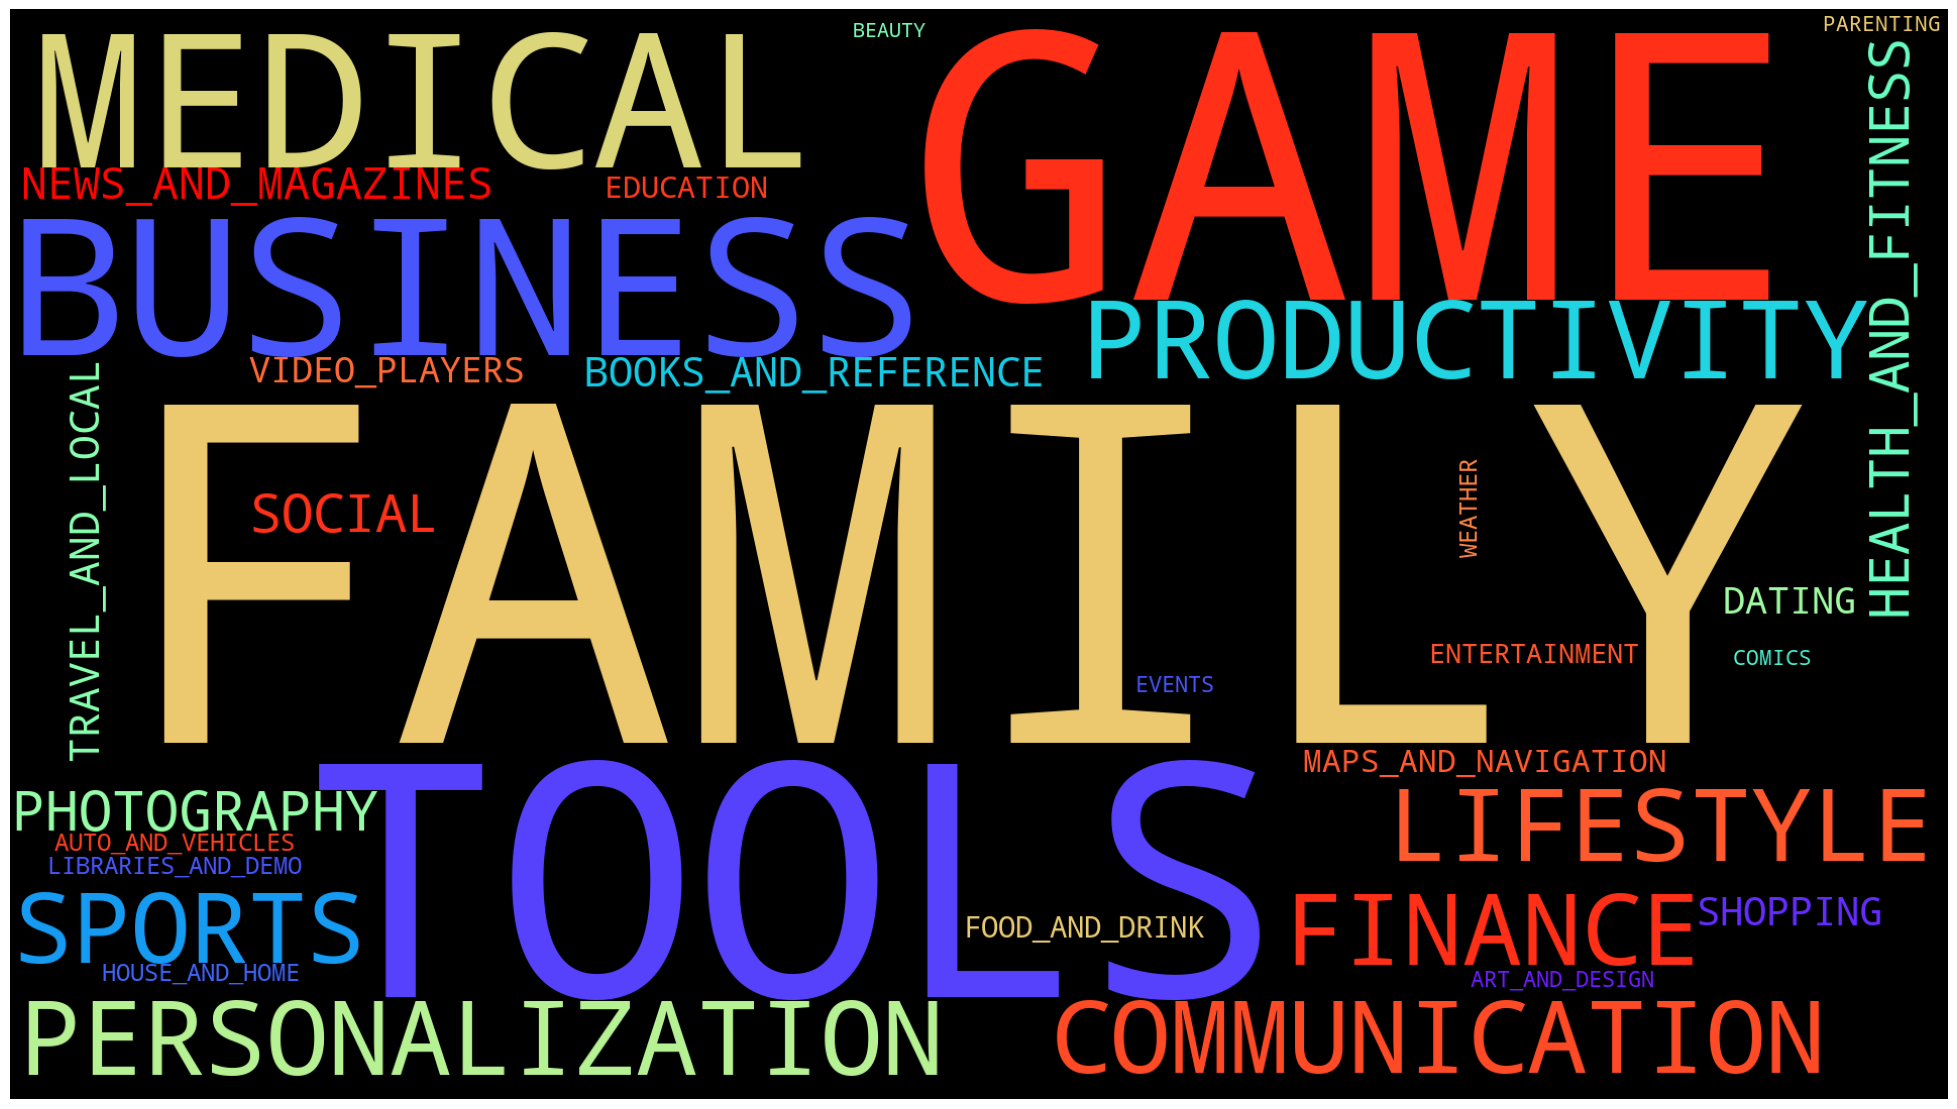

In [55]:
# Set up the figure size
plt.subplots(figsize=(25,15))

# Generate the WordCloud with custom color settings
wordcloud = WordCloud(
                          background_color='black',
                          colormap='rainbow',  # Specify the colormap for the words
                          contour_color='white',  # Specify the contour color for the words
                          contour_width=3,  # Specify the contour width for the words
                          collocations=False,  # Turn off collocations for better control over word colors
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))

# Display the WordCloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Installs
###  It is evident that the categories with the highest installations are 'Game', 'Communication', and 'Social'.

Text(0.5, 1.0, 'Total Installs per Category')

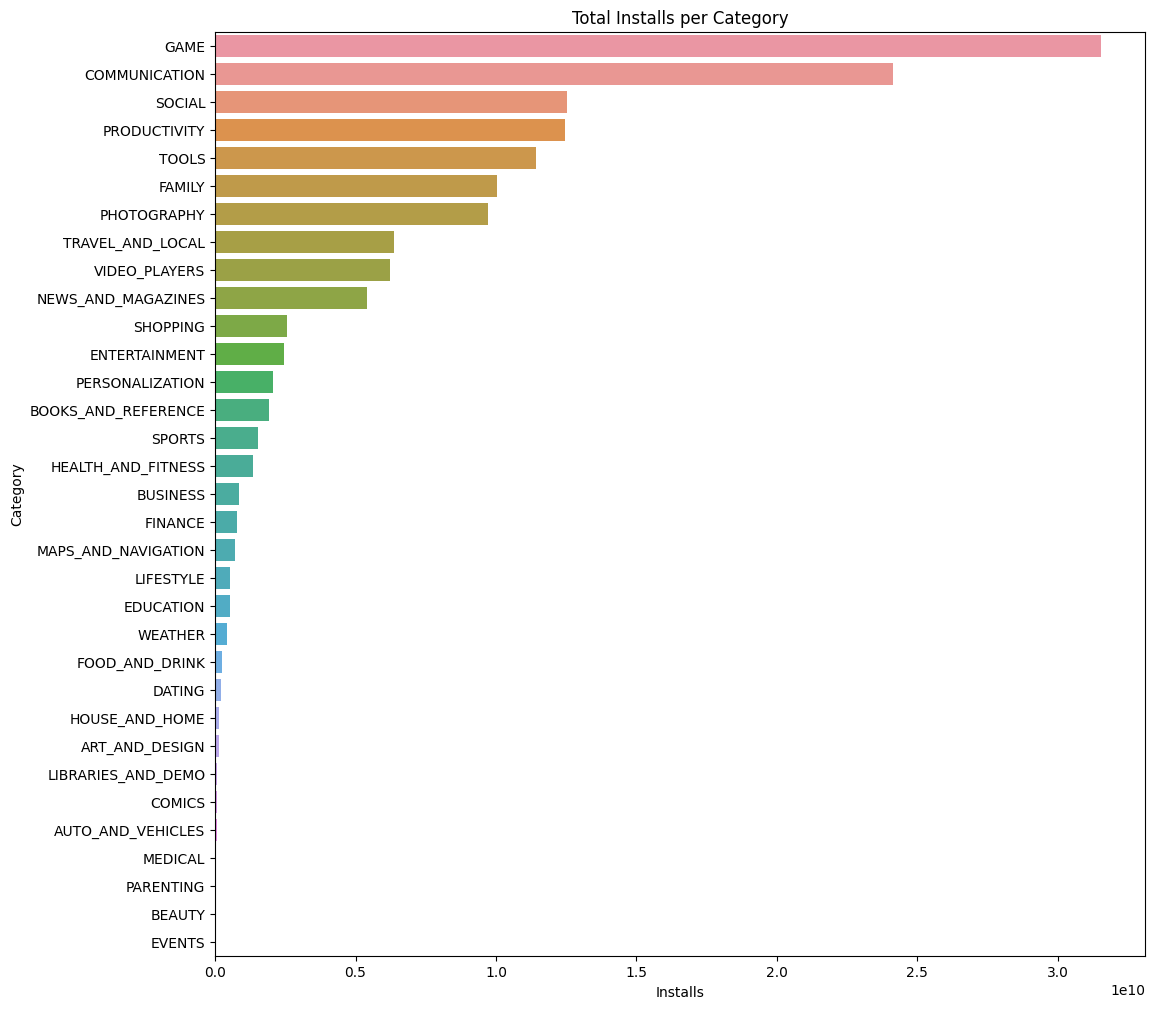

In [56]:
plt.figure(figsize=(12,12))
sum_inst = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df)
plt.title('Total Installs per Category')

## Rating

### From this distribution plotting, it shows that most of the apps in the Play Store are in the range of 4.0 to 4.7.

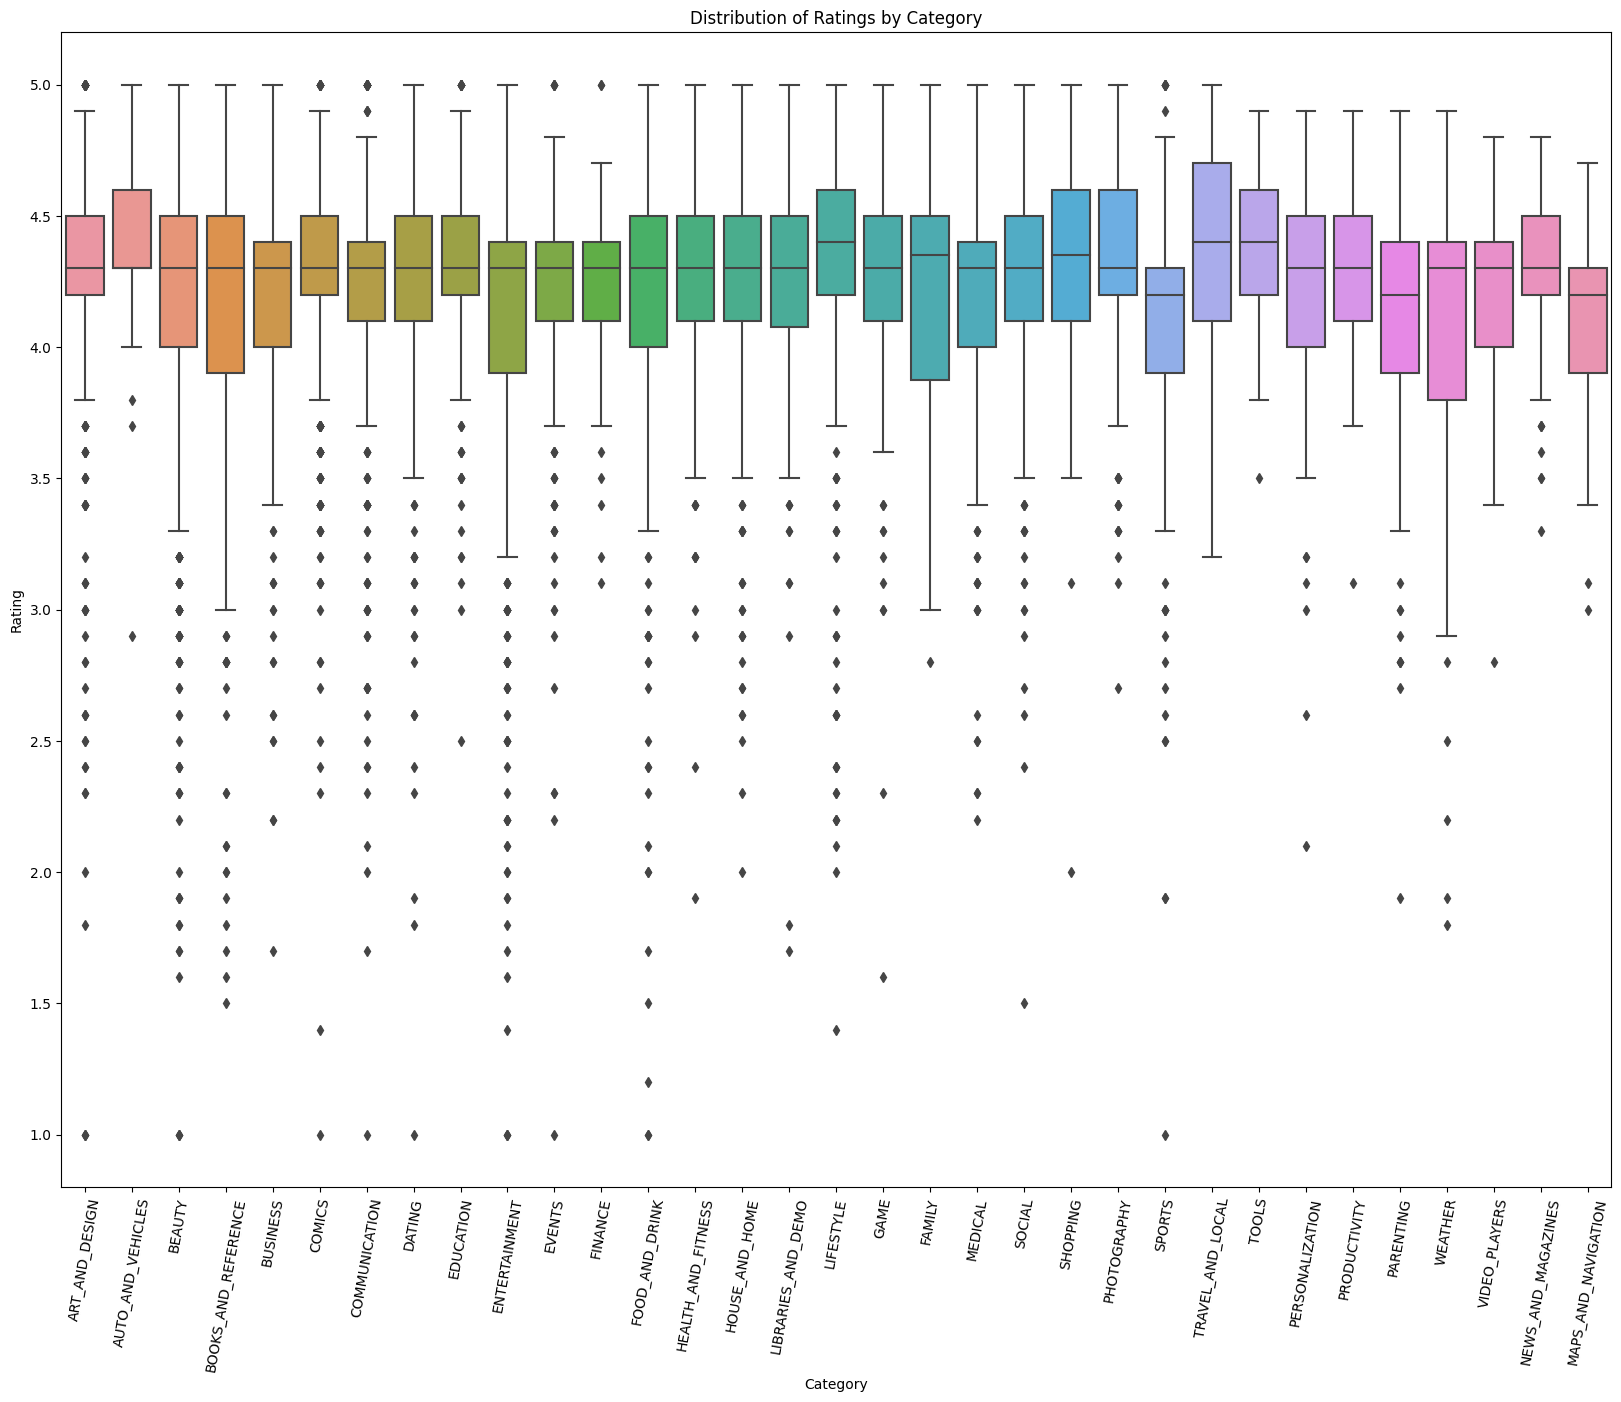

In [57]:
# Set up the figure size
plt.figure(figsize=(20, 15))

# Create a boxplot
sns.boxplot(y='Rating', x='Category', data=df.sort_values('Rating', ascending=False))

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Set category names on x-axis
plt.gca().set_xticklabels(df['Category'].unique())


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Category')

# Show the plot
plt.show()


## Application Type
### From the plot we can imply that majority of the apps in the Play Store are Free apps.

In [58]:
# Filter the dataset to get the counts for natural and technological disasters
Free_Type = df[df['Type'] == 'Free']
Paid_Type = df[df['Type'] == 'Paid']

In [59]:
# Get the counts for natural and technological disasters
Free_Type_count = Free_Type.shape[0]
Paid_Type_count = Paid_Type.shape[0]
Free_Type_count
Paid_Type_count

765

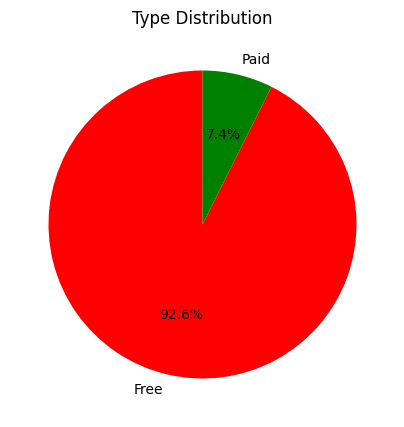

In [65]:
# Data for the chart
labels = ['Free', 'Paid']
colors = ['red', 'green']
sizes = [Free_Type_count, Paid_Type_count]

# Adjust the size of the chart
plt.figure(figsize=(5, 5))  # Set the figsize parameter to adjust the size of the chart

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set chart title
plt.title('Type Distribution')

# Display the chart
plt.show()

## Type and Size & Rating 
### Based on the scatter plot, it appears that most of the free apps tend to have smaller sizes and higher ratings. In contrast, paid apps exhibit a more evenly distributed range of sizes and ratings..

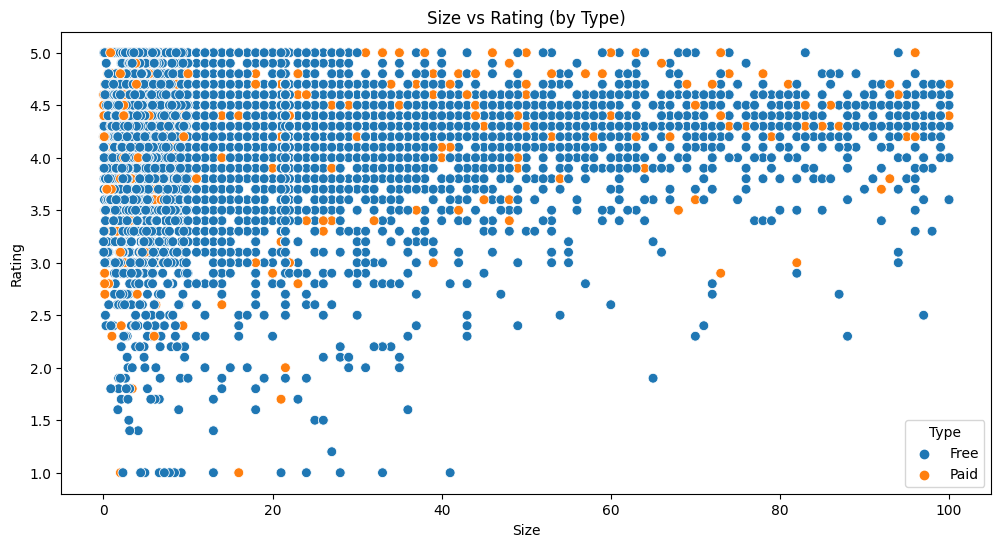

In [67]:
# Create a scatter plot
plt.figure(figsize=(12, 6))  # Set the figsize parameter to adjust the size of the scatter plot
sns.scatterplot(x='Size', y='Rating', hue='Type', data=df, s=50)

# Set plot title and axis labels
plt.title('Size vs Rating (by Type)')
plt.xlabel('Size')
plt.ylabel('Rating')

# Show the plot
plt.show()


## Content Rating
### For Teen group, the relative high amount of app category are 'Social', 'Game', and 'Family'. 
### 'Tools', 'Family', 'Game' are the Top 3 Categories for everyone.

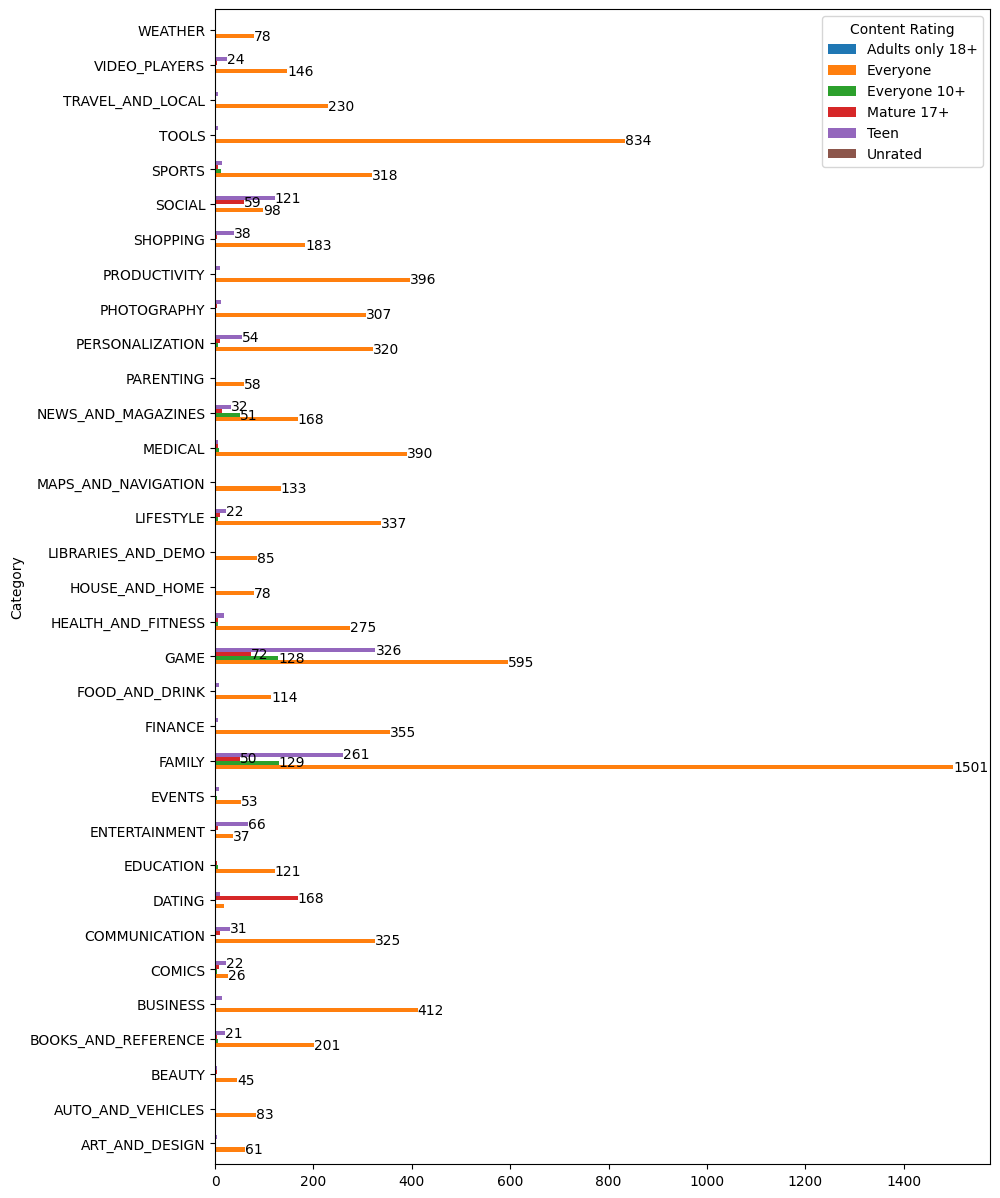

In [68]:

# Groupby and create a horizontal bar chart
Type_cat = df.groupby('Category')['Content Rating'].value_counts().unstack().plot.barh(figsize=(10,15), width=0.7)

# Add numbers on the bars for values greater than 20
for i in Type_cat.containers:
    for j in i:
        width = j.get_width()
        if width > 20:
            plt.annotate(f'{int(width)}', (width, j.get_y() + j.get_height() / 2), ha='left', va='center')

# Show the chart
plt.show()

## Compare the number of "Paid" and "Free" App by Category 
### The "Paid" app are mainly in "Family" and "Medical" category while "Free" app mainly in "Family" and "Game".

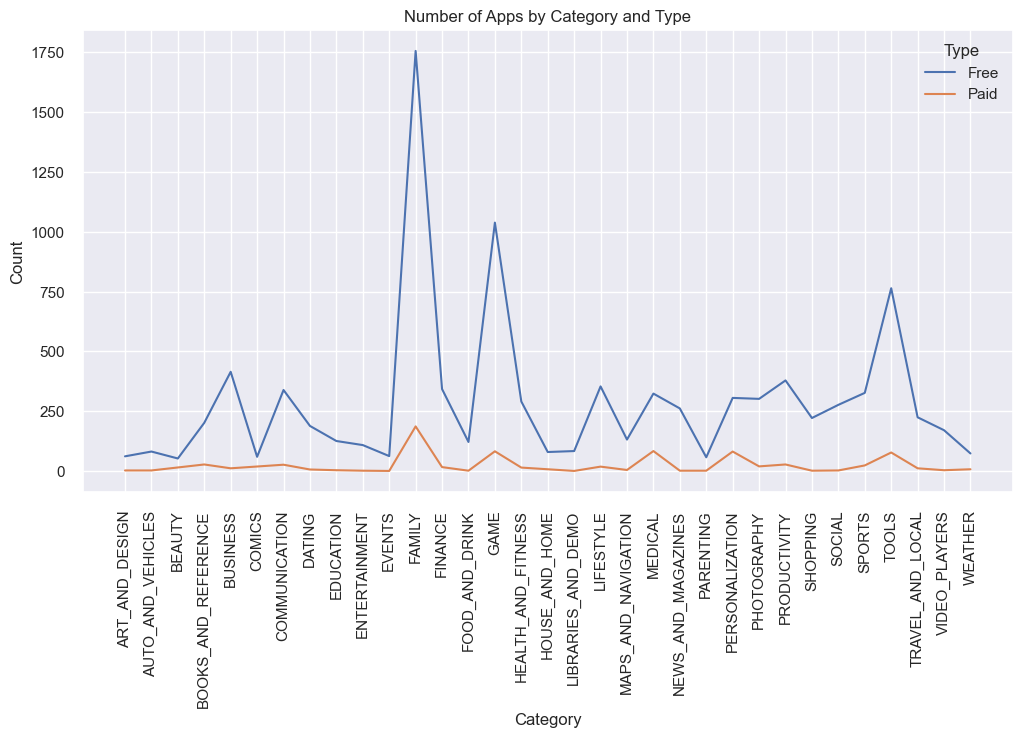

In [108]:
# Group by Category and Type, and count the number of apps
app_count = df.groupby(['Category', 'Type']).size().reset_index(name='Count')

# Create a line chart using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Category', y='Count', hue='Type', data=app_count)
plt.title('Number of Apps by Category and Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



## Mean Price for paid Apps by Category
### The categories with the highest revenue are "Finance", "Lifestyle", and "Events".

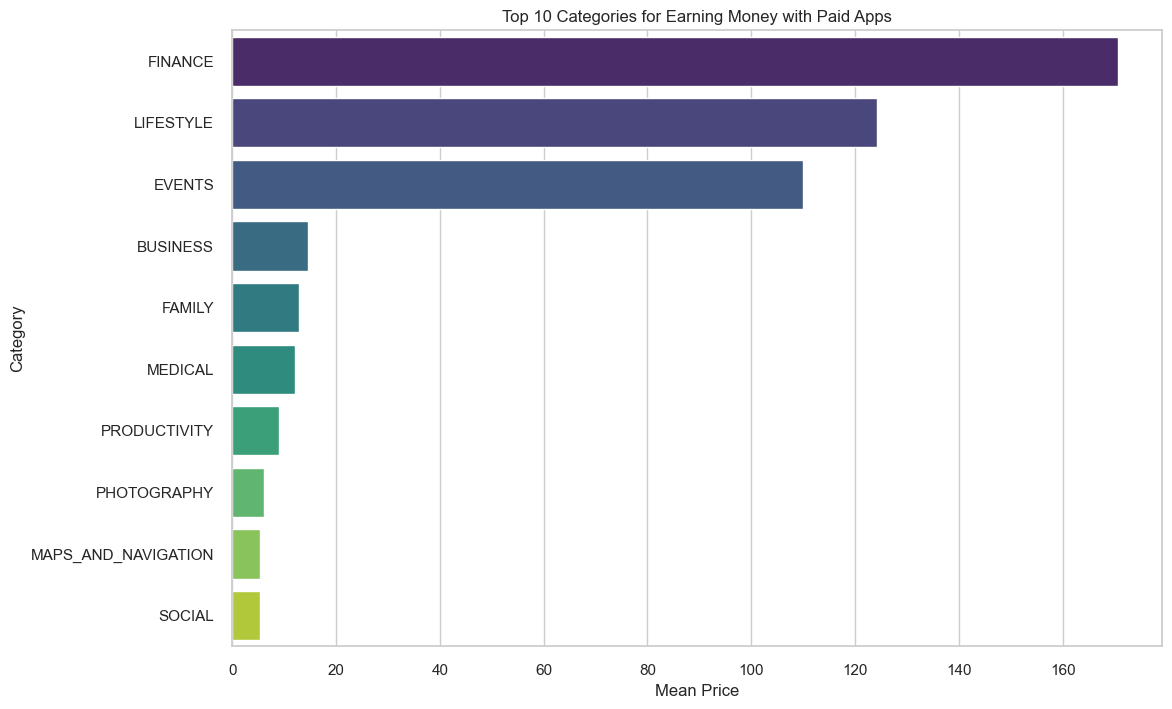

In [135]:
# Filter the data to include only 'Paid' apps
paid_apps = df[df['Type'] == 'Paid']

# Get the top 10 categories based on mean price
top_10_categories = paid_apps.groupby('Category')['Price'].mean().nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 Categories for Earning Money with Paid Apps')
plt.xlabel('Mean Price')
plt.ylabel('Category')
plt.show()

## The increase of Category Installs by Year
### All the category installs increased by Year.  The significant increase from 2017~2018, and the top increase categories are "Game", "Communication", and "Social".

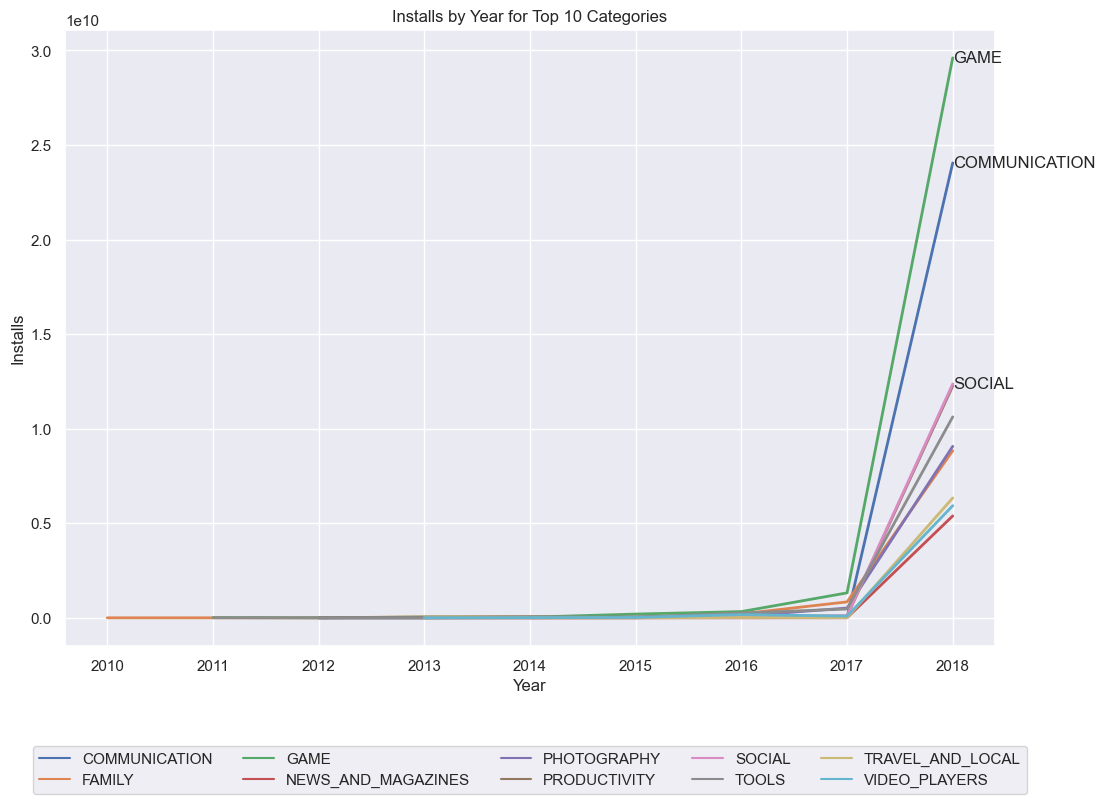

In [70]:
# Create desired columns
df_subset = df[['Category', 'Installs', 'Year']]

# Group the data by Category, Year, and sum the Installs
df_grouped = df_subset.groupby(['Category', 'Year']).sum().reset_index()

# Get the top 10 categories by installs
top_categories = df_grouped.groupby('Category').sum().nlargest(10, 'Installs').index

# Filter the data for the top 10 categories
df_top_categories = df_grouped[df_grouped['Category'].isin(top_categories)]

# Plot the installs by year
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_categories, x='Year', y='Installs', hue='Category', linewidth=2)
plt.title('Installs by Year for Top 10 Categories')
plt.xlabel('Year')
plt.ylabel('Installs')

# Add category labels to the chart for the top 3 categories
for category in top_categories[:3]:
    x = df_top_categories[df_top_categories['Category'] == category]['Year']
    y = df_top_categories[df_top_categories['Category'] == category]['Installs']
    last_year = x.iloc[-1]
    last_installs = y.iloc[-1]
    plt.annotate(category, (last_year, last_installs), ha='left', va='center')

# Put the legend inside the chart
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()



# 6. Models Evaluation and Prediction<a id="models-evaluation-and-prediction"></a> 

### Data preprocessing

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [118]:
df = pd.read_csv('GooglePlayStore_cleaned.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10355 entries, 0 to 10354
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10355 non-null  object 
 1   Category        10355 non-null  object 
 2   Rating          10355 non-null  float64
 3   Reviews         10355 non-null  int64  
 4   Size            10355 non-null  float64
 5   Installs        10355 non-null  int64  
 6   Type            10355 non-null  object 
 7   Price           10355 non-null  float64
 8   Content Rating  10355 non-null  object 
 9   Genres          10355 non-null  object 
 10  Current Ver     10355 non-null  object 
 11  Android Ver     10355 non-null  object 
 12  Month           10355 non-null  object 
 13  Year            10355 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


#### The "Installs" column represents the number of installations for each app , which can be considered as an indicator of app success. So apps with "Installs" greater than 1,000,000 consider as successful.

In [119]:
# Create a new binary column "success" based on the number of installs
df['Success'] = 0
df.loc[df['Installs'] >= 1000000,  'Success'] = 1
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year,Success
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,2018,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,2018,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,2018,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,2018,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,2018,0


In [120]:
df['Success'].value_counts().sort_index()

0    6302
1    4053
Name: Success, dtype: int64

In [121]:
# Encode the 'Category','Content Rating','Genres','Type' features using LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Genres'] = le.fit_transform(df['Genres'])
df['Type'] = le.fit_transform(df['Type'])

In [122]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year,Success
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,0.0,1,9,1.0.0,4.0.3 and up,January,2018,0
1,Coloring book moana,0,3.9,967,14.0,500000,0,0.0,1,12,2.0.0,4.0.3 and up,January,2018,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,0.0,1,9,1.2.4,4.0.3 and up,August,2018,1
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,0.0,4,9,Varies with device,4.2 and up,June,2018,1
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,0.0,1,11,1.1,4.4 and up,June,2018,0


In [123]:
# Choose predict columns
df = df[['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Success']]
df

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Success
0,0,4.1,159,19.000000,0,0.0,1,9,0
1,0,3.9,967,14.000000,0,0.0,1,12,0
2,0,4.7,87510,8.700000,0,0.0,1,9,1
3,0,4.5,215644,25.000000,0,0.0,4,9,1
4,0,4.3,967,2.800000,0,0.0,1,11,0
...,...,...,...,...,...,...,...,...,...
10350,11,4.5,38,53.000000,0,0.0,1,39,0
10351,11,5.0,4,3.600000,0,0.0,1,39,0
10352,20,4.3,3,9.500000,0,0.0,1,71,0
10353,3,4.5,114,21.516165,0,0.0,3,19,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10355 entries, 0 to 10354
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10355 non-null  int32  
 1   Rating          10355 non-null  float64
 2   Reviews         10355 non-null  int64  
 3   Size            10355 non-null  float64
 4   Type            10355 non-null  int32  
 5   Price           10355 non-null  float64
 6   Content Rating  10355 non-null  int32  
 7   Genres          10355 non-null  int32  
 8   Success         10355 non-null  int64  
dtypes: float64(3), int32(4), int64(2)
memory usage: 566.4 KB


### Choose prediction models and get models' interface with specific hyperparameter values by Pycaret 

In [81]:
from pycaret.classification import *
s = setup(data=df, target = 'Success', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Success
2,Target type,Binary
3,Original data shape,"(10355, 9)"
4,Transformed data shape,"(10355, 9)"
5,Transformed train set shape,"(7248, 9)"
6,Transformed test set shape,"(3107, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [84]:
# functional API
best = compare_models(include=['lr', 'dt', 'rf', 'gbc', 'svm', 'ada', 'xgboost'])
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9605,0.9907,0.9454,0.9535,0.9494,0.9171,0.9171,2.6810
gbc,Gradient Boosting Classifier,0.9601,0.9928,0.9454,0.9525,0.9489,0.9162,0.9163,2.5920
ada,Ada Boost Classifier,0.9578,0.9917,0.9425,0.9495,0.9459,0.9113,0.9114,2.5730
xgboost,Extreme Gradient Boosting,0.9570,0.9917,0.9471,0.9433,0.9452,0.9097,0.9098,2.5910
lr,Logistic Regression,0.9461,0.9884,0.8907,0.9690,0.9281,0.8851,0.8872,2.7380
dt,Decision Tree Classifier,0.9409,0.9375,0.9214,0.9275,0.9243,0.8759,0.8760,2.5540
svm,SVM - Linear Kernel,0.6364,0.0000,0.9993,0.5273,0.6875,0.3507,0.4561,2.5390


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

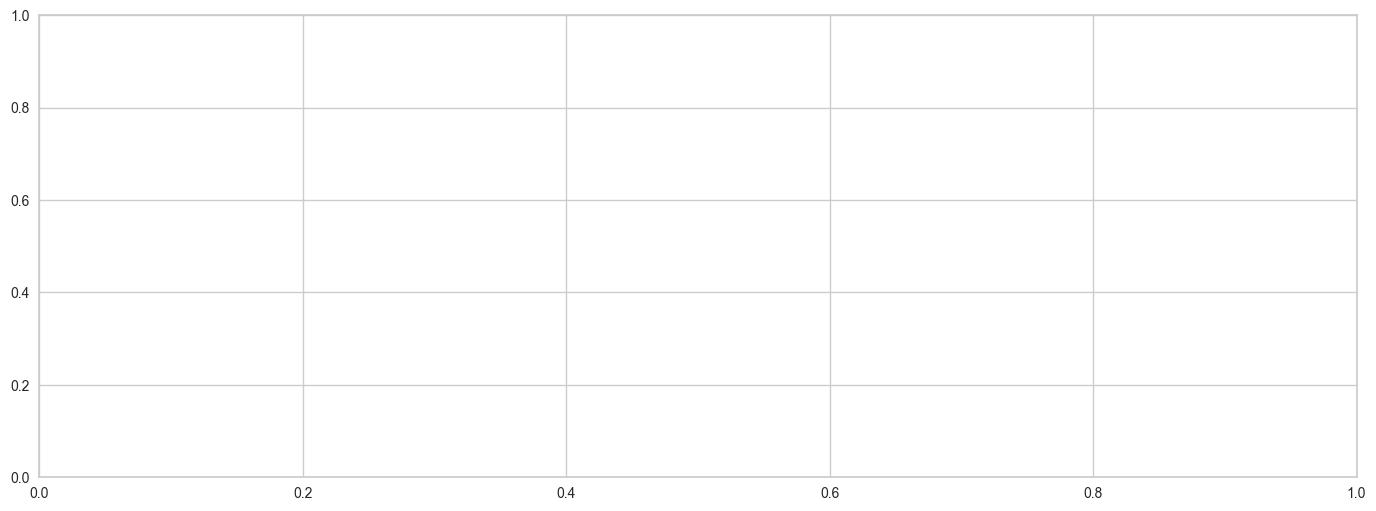

In [83]:
evaluate_model(best);

In [131]:
ada = create_model('ada')
t_ada = tune_model(ada)
f_ada = finalize_model(t_ada)
f_ada

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9669,0.9933,0.9542,0.9610,0.9576,0.9304,0.9305
1,0.9641,0.9956,0.9401,0.9674,0.9536,0.9244,0.9246
2,0.9545,0.9865,0.9331,0.9498,0.9414,0.9042,0.9043
3,0.9600,0.9915,0.9542,0.9443,0.9492,0.9162,0.9163
4,0.9503,0.9932,0.9472,0.9276,0.9373,0.8962,0.8963
5,0.9448,0.9906,0.9085,0.9485,0.9281,0.8833,0.8839
6,0.9531,0.9909,0.9507,0.9310,0.9408,0.9020,0.9021
7,0.9600,0.9931,0.9541,0.9441,0.9490,0.9161,0.9162
8,0.9682,0.9916,0.9435,0.9745,0.9587,0.9329,0.9332


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9697,0.9942,0.9613,0.9613,0.9613,0.9363,0.9363
1,0.9655,0.9961,0.9507,0.9609,0.9558,0.9275,0.9275
2,0.9545,0.9882,0.9401,0.9435,0.9418,0.9044,0.9044
3,0.9628,0.9946,0.9507,0.9541,0.9524,0.9218,0.9218
4,0.9572,0.9929,0.9437,0.9470,0.9453,0.9102,0.9102
5,0.9572,0.9915,0.9366,0.9534,0.9449,0.9100,0.9101
6,0.9600,0.9928,0.9577,0.9412,0.9494,0.9163,0.9164
7,0.9641,0.9936,0.9576,0.9509,0.9542,0.9247,0.9248
8,0.9655,0.9931,0.9399,0.9708,0.9551,0.9271,0.9274


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pipeline(memory=FastMemory(location=C:\Users\teket\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Category', 'Rating', 'Reviews',
                                             'Size', 'Type', 'Price',
                                             'Content Rating', 'Genres'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=0.15, n_estimators=110,
                                    random_state=42))],
         verbose=False)

In [86]:
gbc = create_model('gbc')
t_gbc = tune_model(gbc)
f_gbc = finalize_model(t_gbc)
f_gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9683,0.9937,0.9613,0.9579,0.9596,0.9335,0.9335
1,0.9683,0.9963,0.9507,0.9677,0.9591,0.9332,0.9333
2,0.9503,0.9890,0.9296,0.9429,0.9362,0.8955,0.8956
3,0.9655,0.9936,0.9577,0.9544,0.9561,0.9277,0.9277
4,0.9531,0.9919,0.9401,0.9401,0.9401,0.9016,0.9016
5,0.9517,0.9914,0.9155,0.9594,0.9369,0.8979,0.8985
6,0.9572,0.9935,0.9542,0.9377,0.9459,0.9106,0.9107
7,0.9628,0.9930,0.9541,0.9507,0.9524,0.9218,0.9218
8,0.9655,0.9932,0.9470,0.9640,0.9554,0.9273,0.9274


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9738,0.9943,0.9683,0.9649,0.9666,0.9450,0.9450
1,0.9600,0.9956,0.9472,0.9505,0.9489,0.9160,0.9160
2,0.9517,0.9869,0.9331,0.9431,0.9381,0.8985,0.8985
3,0.9586,0.9940,0.9577,0.9379,0.9477,0.9135,0.9136
4,0.9531,0.9922,0.9401,0.9401,0.9401,0.9016,0.9016
5,0.9600,0.9898,0.9366,0.9603,0.9483,0.9157,0.9159
6,0.9628,0.9928,0.9613,0.9446,0.9529,0.9221,0.9222
7,0.9614,0.9938,0.9576,0.9443,0.9509,0.9191,0.9191
8,0.9669,0.9927,0.9505,0.9642,0.9573,0.9302,0.9303


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pipeline(memory=FastMemory(location=C:\Users\teket\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Category', 'Rating', 'Reviews',
                                             'Size', 'Type', 'Price',
                                             'Content Rating', 'Genres'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.05, loss='log_loss',
                                            max_depth=6, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.3,
                                            min_samples_leaf=4,
                                            min_samples_split=10,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=270,
                                            n_iter_no_change=None,
                                            random_state=42, subsample=0.7,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [88]:
xgboost = create_model('xgboost')
t_xgboost = tune_model(xgboost)
f_xgboost = finalize_model(t_xgboost)
f_xgboost

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9628,0.9933,0.9577,0.9477,0.9527,0.9220,0.9220
1,0.9669,0.9959,0.9507,0.9643,0.9574,0.9304,0.9304
2,0.9531,0.9861,0.9437,0.9371,0.9404,0.9017,0.9017
3,0.9559,0.9921,0.9507,0.9375,0.9441,0.9076,0.9077
4,0.9462,0.9911,0.9401,0.9239,0.9319,0.8875,0.8876
5,0.9572,0.9906,0.9401,0.9502,0.9451,0.9101,0.9101
6,0.9559,0.9919,0.9542,0.9345,0.9443,0.9077,0.9079
7,0.9600,0.9941,0.9505,0.9472,0.9489,0.9160,0.9160
8,0.9599,0.9919,0.9399,0.9568,0.9483,0.9156,0.9157


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9669,0.9931,0.9683,0.9483,0.9582,0.9308,0.9309
1,0.9600,0.9956,0.9472,0.9505,0.9489,0.9160,0.9160
2,0.9476,0.9849,0.9366,0.9301,0.9333,0.8902,0.8902
3,0.9614,0.9921,0.9577,0.9444,0.9510,0.9192,0.9192
4,0.9572,0.9914,0.9542,0.9377,0.9459,0.9106,0.9107
5,0.9503,0.9905,0.9401,0.9336,0.9368,0.8959,0.8959
6,0.9586,0.9936,0.9542,0.9410,0.9476,0.9134,0.9134
7,0.9559,0.9925,0.9435,0.9435,0.9435,0.9073,0.9073
8,0.9627,0.9919,0.9399,0.9638,0.9517,0.9213,0.9215


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\teket\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Category', 'Rating', 'Reviews',
                                             'Size', 'Type', 'Price',
                                             'Content Rating', 'Genres'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='binary:logistic', predictor=None, ...))],
         verbose=False)

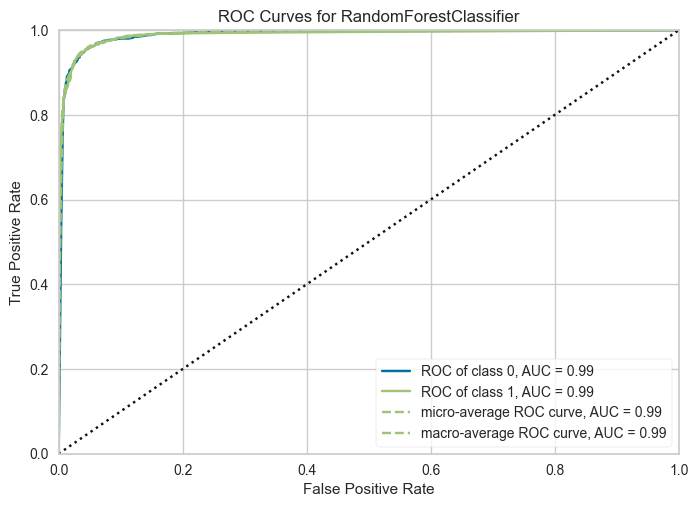

In [89]:
plot_model(rf)

### The model shows a very good performance, which is 0.99.

# Make predictions by Yellowbrick

In [124]:
df = df[['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Success']]

In [125]:
X = df.drop(['Success'], axis = 1)
y = df['Success']

In [126]:
X

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres
0,0,4.1,159,19.000000,0,0.0,1,9
1,0,3.9,967,14.000000,0,0.0,1,12
2,0,4.7,87510,8.700000,0,0.0,1,9
3,0,4.5,215644,25.000000,0,0.0,4,9
4,0,4.3,967,2.800000,0,0.0,1,11
...,...,...,...,...,...,...,...,...
10350,11,4.5,38,53.000000,0,0.0,1,39
10351,11,5.0,4,3.600000,0,0.0,1,39
10352,20,4.3,3,9.500000,0,0.0,1,71
10353,3,4.5,114,21.516165,0,0.0,3,19


RandomForestClassifier:
  Accuracy: 100.00%
  Precision: 100.00%
  F1 Score: 100.00%

AdaBoostClassifier:
  Accuracy: 77.89%
  Precision: 77.71%
  F1 Score: 77.76%

GradientBoostingClassifier:
  Accuracy: 62.24%
  Precision: 74.31%
  F1 Score: 49.27%

XGBClassifier:
  Accuracy: 83.24%
  Precision: 83.22%
  F1 Score: 83.23%



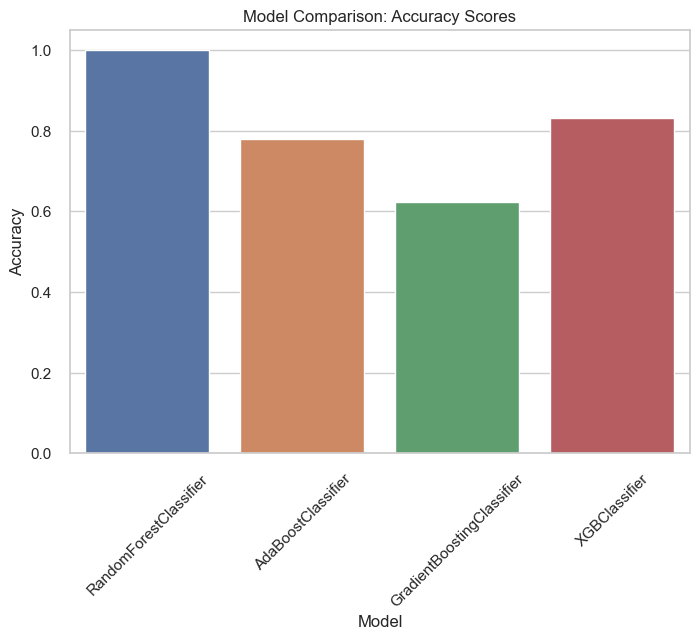

In [127]:
# make predictions, and evaluating the models using accuracy, precision, and F1-score metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.ensemble import AdaBoostClassifier
import numpy as np

accuracy_scores = []  # create an empty list to store accuracy scores

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle = True)

# define a list of machine learning models to be evaluated.
models = [
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
    
    AdaBoostClassifier(random_state=123),
    
    GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features='sqrt',
                           min_impurity_decrease=0.05, min_samples_leaf=2,
                           n_estimators=140, random_state=123, subsample=0.35),
    
    XGBClassifier(base_score=None, booster='gbtree', n_estimators=100, n_jobs=-1, random_state=123)
    
]

# Define the names of the models for x-axis labels
model_names = [model.__class__.__name__ for model in models]

# Fits the estimator to the data, make predictions, and calculates accuracy, precision, and F1-score
def score_model(X, y, estimator, **kwargs):
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)
    accuracy = accuracy_score(expected, predicted)
    precision = precision_score(expected, predicted, average='weighted', zero_division=True)
    f1 = f1_score(expected, predicted, average='weighted')
    
    # Print model evaluation metrics
    print(f"{estimator.__class__.__name__}:")
    print(f'  Accuracy: {accuracy*100:.2f}%')
    print(f'  Precision: {precision*100:.2f}%')
    print(f'  F1 Score: {f1*100:.2f}%\n')   
    return accuracy  # return accuracy score

# Use the accuracy scores to create a bar chart for model comparison
# Loop through each model and store accuracy scores in the list
for model in models:
    accuracy = score_model(X, y, model)
    accuracy_scores.append(accuracy)

# Convert the accuracy scores list to a numpy array
accuracy_scores = np.array(accuracy_scores)

# Set seaborn style
sns.set(style="whitegrid")

# Create bar plot with seaborn
sns.barplot(x=model_names, y=accuracy_scores)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

### Based on these results, it can be concluded that RandomForestClassifier performed the best among the four classifiers, achieving the highest accuracy, precision, and F1 score. AdaBoostClassifier and XGBClassifier also performed reasonably well, while GradientBoostingClassifier had comparatively lower performance in terms of accuracy and F1 score.

# 

# Explore new data with other factors that affect App success

In [128]:
X = X.drop(['Reviews', 'Rating'], axis=1)

In [129]:
X

,Category,Size,Type,Price,Content Rating,Genres
0,0,19.000000,0,0.0,1,9
1,0,14.000000,0,0.0,1,12
2,0,8.700000,0,0.0,1,9
3,0,25.000000,0,0.0,4,9
4,0,2.800000,0,0.0,1,11
...,...,...,...,...,...,...
10350,11,53.000000,0,0.0,1,39
10351,11,3.600000,0,0.0,1,39
10352,20,9.500000,0,0.0,1,71
10353,3,21.516165,0,0.0,3,19


In [130]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier


# Evaluate and compare the performance with new attribute (without Reviews and Rating) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle = True)
models = [

    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
    

    XGBClassifier(base_score=None, booster='gbtree', n_estimators=100, n_jobs=-1, random_state=123)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)
    
    accuracy = accuracy_score(expected, predicted)
    precision = precision_score(expected, predicted, average='weighted', zero_division=True)
    f1 = f1_score(expected, predicted, average='weighted')
    
    # Print model evaluation metrics
    print(f"{estimator.__class__.__name__}:")
    print(f'  Accuracy: {accuracy*100:.2f}%')
    print(f'  Precision: {precision*100:.2f}%')
    print(f'  F1 Score: {f1*100:.2f}%\n')
    
for model in models:
    score_model(X, y, model)

RandomForestClassifier:
  Accuracy: 89.51%
  Precision: 89.48%
  F1 Score: 89.49%

XGBClassifier:
  Accuracy: 78.49%
  Precision: 78.47%
  F1 Score: 77.94%



### The RandomForestClassifier, when trained with features including Size, Type, Price, Content Rating, and Genre of an app, along with Reviews & Ratings, achieves a perfect accuracy of 100%. However, even without considering Reviews & Ratings, the Classifier still performs remarkably well with an accuracy of 89.51%. This suggests that the aforementioned features alone can predict with an 89.51% certainty whether an app on the Google Play Store will be success and be a hit.


# 7. Project Conclusion<a id="project-conclusion"></a>  

## Tools used for data preprocessing:

1. Pandas
2. NumPy
3. Pandas Profiling

## Tools used for visualization:

1. Matplotlib
2. Seaborn
3. Plotly

## Tasks performed:

1. Data clean using NumPy, Pandas, and Scikit-learn
2. Used different machine learning models to predict app ratings
3. Compared the performance of the models

## Findings from data analysis:

1. Most of the apps are free
2. majority of the free apps are in small size and having high rating
3. Categories with highest app count: family, gaming, and tools
4. Most apps are rated for everyone
5. Majority of payments are made for family and medical apps
6. The highest installs categories are Game, Communication, and Social
7. The significant increased of installs is 2017~2018
8. To accurately determine the potential for maximum installs, the features of Size, Type, Price, Content Rating, and Genre should all be taken into consideration.
9. Rating and Reviews are important data points for predicting the success of GoogleApps.
